<a href="https://colab.research.google.com/github/simodepth/Identify-Rewritten-Meta-Tags/blob/main/Detect_Google_SERP_Title_and_Snippet_Rewrites_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detect Google SERP Title and Snippet Rewrites with Python


---

Since August 2021 Google took over the Title tags rewriting based upon algorithmic measures. Although this is occasionally a fair move from the search engine to better match the search intent, most of the time it turns out as a proper curb to one's webpage visibility.

Since the rewriting event, several interesting tools have been released by SEO Saas tools. Even though you don't want to bite the hand that's feeding you,  the trade-off in their usage is oftentimes due to discouraging fees which may prevent users from joining the platforms.  

That is the reason behind this free Python framework, which is engineered to compare a fistful of page titles and meta descriptions to what is shown in the SERPs by using a Screaming Frog crawl and a free SERP API. 


#Heads up 🔴


---

Because the **SERP API grants 100 free search per month**, this framework is not recommended for those working with massive dataset/database.

Even if you have resources for a higher plan, you’ll need to be careful which URLs you want to send in for analysis and how often.

However, you can subscribe to one of the [ SERP API plan](https://serpapi.com/change-plan)

#Requirements & Assumptions


---

- [SERP API](https://serpapi.com/) key 
- Screaming Frog HTML crawl list or CSV with URLs

In [12]:
#remember to add an exclamation mark at the beginning if you're using Colab
!pip install google-search-results
!pip install polyfuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
from serpapi import GoogleSearch
from polyfuzz import PolyFuzz #this is to calculate the comparison similarity scores

##Import the crawl CSV into a pandas dataframe


---

You’ll notice a **comment hashmark #** at the end of the read_csv function.

**If you want to test the script using a small subset of URLs, remove the hashmark and change the number to the number of URLs you want to process**.

This can save you from blowing your entire API credits in one go.

In [14]:
df = pd.read_csv("/content/my.internal_html.csv")[["Address","Indexability","Title 1","Meta Description 1","H1-1"]] #[:5] 

df = df[df["Indexability"] == "Indexable"] #filter out rows that aren't marked as "indexable"
df = df.fillna('None') #Replace NaN (no value) values with a string. This is needed for comparison processing.
df.drop(['Indexability'], axis=1, inplace=True) #drop out the Indexability column as we've already filtered it out
df["Meta Description 1"] = df["Meta Description 1"].apply(lambda x: x[:150]) #many meta descriptions are more characters than what is displayed in the SERPs, therefore we need to cap the number of characters to 150 to get a better idea of total rewrites

In [15]:
#@title Create 4 empty lists to store data
serp_title_list = []
serp_desc_list = []
serp_title_list_diff = []
serp_desc_list_diff = []

In [16]:
#@title Send each URLs to the SERP API
#Loop through the crawled list of URLs to send each of them to the API, which will make a query the title and meta description snippet
for index, row in df.iterrows():

  params = {
    "q": row["Address"],
    "hl": "en", #make sure you set up the **language** required for the output
    "gl": "gb", #make sure you set up the **location** required for the output
    "api_key": "db57459f1cd2ae0182a0c4684b999ca261a278a98a16398295181c8b699c4da4"
  }

  search = GoogleSearch(params)
  results = search.get_dict()

  serp_title = results["organic_results"][0]["title"]
  serp_desc = results["organic_results"][0]["snippet"][:150]

  serp_title_list.append(serp_title)
  serp_desc_list.append(serp_desc)

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [17]:
#@title Add the obtained titles and meta snippets to our dataframe
df["SERP Title"] = serp_title_list
df["SERP Meta"] = serp_desc_list

##Calculate a similarity score with Polyfuzz


---

This calculates the accuracy level in which both the original title tags and meta descriptions match with their factual SERP counterpart.

**The scores range 0-1 with 1 being the perfect match**. 


In [19]:
model = PolyFuzz("EditDistance")
model.match(serp_title_list, df["Title 1"].tolist())
df2 = model.get_matches()

model.match(serp_desc_list, df["Meta Description 1"].tolist())
df3 = model.get_matches()

model.match(serp_title_list, df["H1-1"].tolist())
df4 = model.get_matches()

In [20]:
#@title Import those similarity scores into a list
df["SERP Title Accuracy Level"] = df2["Similarity"].tolist()
df["SERP Meta Accuracy Level"] = df3["Similarity"].tolist()
df["SERP H1 Accuracy Level"] = df4["Similarity"].tolist()

In [21]:
#@title Let's make a little bit of Formatting
df = df.sort_values(by='SERP Title Accuracy Level', ascending=True) #Sort by SERP title difference descending
df["SERP Title Accuracy Level"] = df["SERP Title Accuracy Level"].round(3) #Round the similarity scores for each to 3 places
df["SERP Meta Accuracy Level"] = df["SERP Meta Accuracy Level"].round(3)
df["SERP H1 Accuracy Level"] = df["SERP H1 Accuracy Level"].round(3)

In [23]:
#df --> if you only want the output and NOT to download the results
df.to_csv("title-snippet-rewrites.csv")

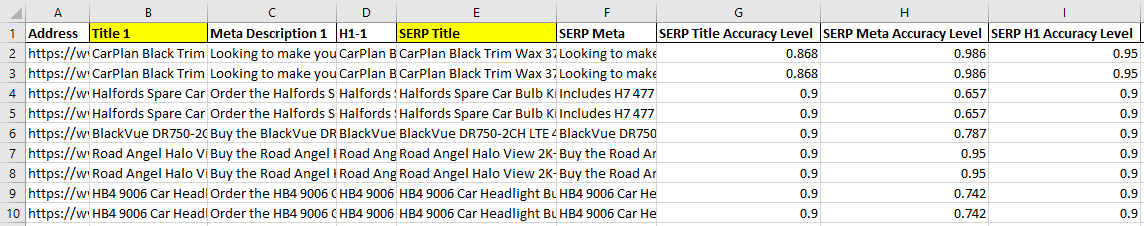